In [34]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error


### Read Data


In [90]:
df_jan = pd.read_parquet('fhv_tripdata_2021-01.parquet', engine='pyarrow')
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [91]:
df_feb = pd.read_parquet('fhv_tripdata_2021-02.parquet', engine='pyarrow')
df_feb.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


### Question1 

In [92]:
print(f"No of records in Jan data is: {df_jan.shape[0]}")

No of records in Jan data is: 1154112


### Question 2

In [93]:
df_jan['duration'] = df_jan['dropOff_datetime'] - df_jan['pickup_datetime']
df_jan['duration'] = df_jan['duration'].dt.total_seconds()/60
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [94]:
print(f"Average trip duration in Jan is: {df_jan['duration'].mean()}")


Average trip duration in Jan is: 19.167224093791006


### Data Preparation

<AxesSubplot:>

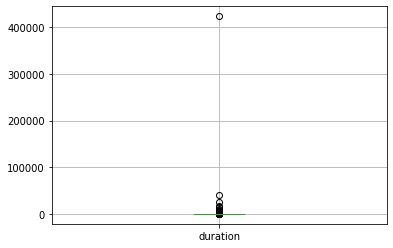

In [20]:
df_jan[['duration']].boxplot()

In [21]:
df_jan.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [22]:
initial_num_of_rows = df_jan.shape[0]
initial_num_of_rows

1154112

In [23]:
df_jan = df_jan.loc[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60), ]
final_num_of_rows = df_jan.shape[0]
final_num_of_rows

1109826

In [25]:
print(f"No of records dropped from Jan data is: {initial_num_of_rows - final_num_of_rows}")


No of records dropped from Jan data is: 44286


### Fraction of Missing Values

In [27]:
print(f"Fraction of Missing Values in pickup location ID columns is: {df_jan['PUlocationID'].isnull().sum()/df_jan.shape[0]}")



Fraction of Missing Values in pickup location ID columns is: 0.8352732770722617


### One Hot Encoding

In [28]:
df_jan = df_jan[['PUlocationID', 'DOlocationID', 'duration']]
df_jan.head()

,PUlocationID,DOlocationID,duration
0,NaN,NaN,17.000000
1,NaN,NaN,17.000000
3,NaN,72.0,8.283333
4,NaN,61.0,15.216667
5,NaN,71.0,9.050000


In [29]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)
df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)


In [30]:
df_jan.isnull().sum()

PUlocationID    0
DOlocationID    0
duration        0
dtype: int64

In [31]:
df_jan.shape

(1109826, 3)

In [32]:
one_hot_encoded_data = pd.get_dummies(df_jan, columns = ['PUlocationID', 'DOlocationID'])
# print(one_hot_encoded_data)

In [33]:
one_hot_encoded_data.head()

,duration,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_2.0,PUlocationID_3.0,PUlocationID_4.0,PUlocationID_5.0,PUlocationID_6.0,PUlocationID_7.0,PUlocationID_8.0,...,DOlocationID_256.0,DOlocationID_257.0,DOlocationID_258.0,DOlocationID_259.0,DOlocationID_260.0,DOlocationID_261.0,DOlocationID_262.0,DOlocationID_263.0,DOlocationID_264.0,DOlocationID_265.0
0,17.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.283333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15.216667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.050000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
one_hot_encoded_data.shape

(1109826, 526)

In [45]:
target = 'duration'
feature_cols = [elem for elem in list(one_hot_encoded_data.columns) if elem != target]


In [46]:
dict_vec = DictVectorizer()

In [50]:
# train_dict = one_hot_encoded_data[feature_cols].to_dict(orient='records')

In [51]:
# X_train = dv.fit_transform(train_dict)

In [49]:
one_hot_encoded_data.head()

,duration,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_2.0,PUlocationID_3.0,PUlocationID_4.0,PUlocationID_5.0,PUlocationID_6.0,PUlocationID_7.0,PUlocationID_8.0,...,DOlocationID_256.0,DOlocationID_257.0,DOlocationID_258.0,DOlocationID_259.0,DOlocationID_260.0,DOlocationID_261.0,DOlocationID_262.0,DOlocationID_263.0,DOlocationID_264.0,DOlocationID_265.0
0,17.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.283333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15.216667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.050000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train = one_hot_encoded_data[feature_cols]

In [54]:
print(f"The dimensionality of feature matrix is: {X_train.shape[1]}")


The dimensionality of feature matrix is: 525


### Training a model

In [55]:
y_train = df_jan[target].values

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_train_pred = lr.predict(X_train)

In [60]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

In [63]:
print(f"RMSE on train data is: {train_rmse}")


RMSE on train data is: 10.528521574970403


### Evaluation of the model

In [74]:
df_feb['duration'] = df_feb['dropOff_datetime'] - df_feb['pickup_datetime']
df_feb['duration'] = df_feb['duration'].dt.total_seconds()/60
df_feb.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.800000


In [75]:
df_feb = df_feb.loc[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60), ]

In [76]:
df_feb = df_feb[['PUlocationID', 'DOlocationID', 'duration']]
df_feb.head()

,PUlocationID,DOlocationID,duration
1,173.0,82.0,10.666667
2,173.0,56.0,14.566667
3,82.0,129.0,7.950000
4,NaN,225.0,13.800000
5,NaN,61.0,8.966667


In [77]:
df_feb['PUlocationID'] = df_feb['PUlocationID'].fillna(-1)
df_feb['DOlocationID'] = df_feb['DOlocationID'].fillna(-1)


In [84]:
one_hot_encoded_feb_data = pd.get_dummies(df_feb, columns = ['PUlocationID', 'DOlocationID'])
one_hot_encoded_feb_data.head()

,duration,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_2.0,PUlocationID_3.0,PUlocationID_4.0,PUlocationID_5.0,PUlocationID_6.0,PUlocationID_7.0,PUlocationID_8.0,...,DOlocationID_256.0,DOlocationID_257.0,DOlocationID_258.0,DOlocationID_259.0,DOlocationID_260.0,DOlocationID_261.0,DOlocationID_262.0,DOlocationID_263.0,DOlocationID_264.0,DOlocationID_265.0
1,10.666667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.566667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.950000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.800000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.966667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_valid = one_hot_encoded_feb_data[feature_cols]

In [85]:
y_valid = one_hot_encoded_feb_data[target].values

In [86]:
y_valid_pred = lr.predict(X_valid)

In [87]:
valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)

In [88]:
print(f"RMSE on valid data is: {valid_rmse}")


RMSE on valid data is: 16677025.441417908
